<a href="https://colab.research.google.com/github/AshmithaMB/Autocorrect-NLP/blob/main/Autocorrect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Autocorrection  with  NLP*

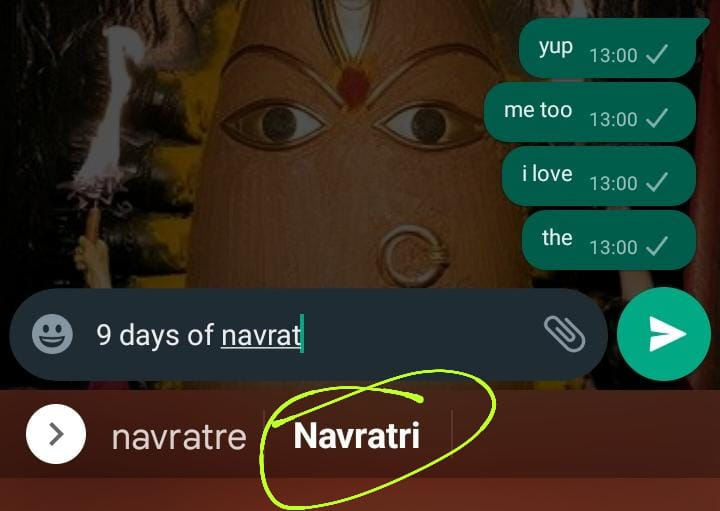

#####*Input File Source*

*I have used [this](https://isha.sadhguru.org/uk/en/wisdom/article/what-is-navratri-nine-days-of-navratri-explained) blog as a text file for this project.*

#####*Installing textdistance with pip command and importing other required libraries*

In [11]:
!pip install textdistance
import numpy as np
import pandas as pd
import re
import textdistance
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
words = []

with open("sadhguru_on_navaratri.txt", 'r') as tmp:
   files = tmp.read()
   files = files.lower()
   words = re.findall('\w+', files)

* *Here, I am reading the contents of the file "sadhguru_on_navaratri.txt" and converting it to lowercase. Then using regular expression matching to extract all the words from the text, ignoring non-alphanumeric characters.* 
* *The extracted words are stored in a list called `words`.*

In [6]:
len(words)

1779

In [12]:
unique_words = set(words)
print('Unique Words : \n', list(unique_words)[0:6])
print("Total Unique Words : \n", len(unique_words))

Unique Words : 
 ['miss', 'establish', 'nights', 'remaining', 'i', 'reach']
Total Unique Words : 
 544


##### Checking the Frequency of the words

In [7]:
from collections import Counter
frequency_words = {}
frequency_words = Counter(words)
print(frequency_words.most_common()[0:10])

[('the', 125), ('you', 69), ('of', 64), ('is', 62), ('and', 39), ('to', 38), ('a', 34), ('are', 33), ('that', 31), ('it', 30)]


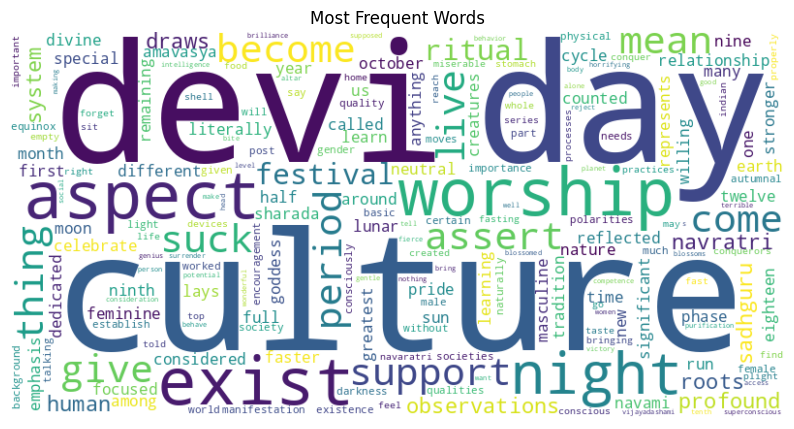

In [10]:
wordcloud_text = ' '.join(frequency_words.keys())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words');

*Now, I am calculating the probabilities of each word in a text by counting their frequencies and dividing by the total number of words, to know the relative occurrence of words in the text.*

In [8]:
probability_of_words = {}
print(sum(frequency_words.values()))

total_words = sum(frequency_words.values())
print(frequency_words.keys())

for word in frequency_words.keys():
  probability_of_words[word] = frequency_words[word]/total_words

print('Probabilities of each word : \n', probability_of_words)

1779
dict_keys(['what', 'is', 'navratri', 'sadhguru', 'this', 'culture', 'draws', 'its', 'roots', 'on', 'profound', 'observations', 'of', 'the', 'human', 'system', 'and', 'relationship', 'with', 'earth', 'moon', 'sun', 'different', 'aspects', 'divine', 'also', 'reflected', 'in', 'when', 'how', 'we', 'celebrate', 'our', 'festivals', 'literally', 'means', 'nine', 'nights', 'these', 'are', 'counted', 'from', 'day', 'after', 'new', 'or', 'amavasya', 'first', 'days', 'lunar', 'cycle', 'considered', 'feminine', 'a', 'special', 'time', 'for', 'devi', 'who', 'represents', 'nature', 'ninth', 'called', 'navami', 'one', 'half', 'around', 'full', 'neutral', 'remaining', 'eighteen', 'masculine', 'phase', 'month', 'about', 'that', 'why', 'tradition', 'all', 'worship', 'up', 'to', 'dedicated', 'there', 'twelve', 'periods', 'year', 'each', 'focused', 'aspect', 'comes', 'october', 'most', 'significant', 'because', 'it', 'sharada', 'goddess', 'learning', 'among', 'many', 'things', 'being', 'can', 'do', 

In [16]:
def autocorrect(word):
    word = word.lower()

    if word in unique_words:
        return 'It appears that your word choice is accurate'
    
    similar = [(1 - textdistance.Jaccard(qval=2).distance(i, word)) for i in frequency_words.keys()]
    
    df = pd.DataFrame.from_dict(probability_of_words, orient='index').reset_index()
    df = df.rename(columns={'index': 'Word', 0: 'Probabilities'})
    df['Similarity'] = similar
    output = df.sort_values(['Similarity', 'Probabilities'], ascending=False).head()
    
    return output

In [17]:
print(list(autocorrect('nigh')['Word']))

['night', 'nights', 'right', 'light', 'plight']


In [18]:
word1 = 'devi'
ans = autocorrect(word1)
print(ans)

It appears that your word choice is accurate


In [27]:
#@title AutoCorrect Application { vertical-output: true }
word1= "exist" #@param {type:"string"}
ans = autocorrect(word1)
#@markdown Answer:
print(ans)

It appears that your word choice is accurate


In [30]:
#@title AutoCorrect Application { vertical-output: true }
word11= "luar" #@param {type:"string"}
ans = autocorrect(word11)

#@markdown Answer:
print(ans)


      Word  Probabilities  Similarity
49   lunar       0.000562    0.400000
39     are       0.018550    0.250000
86    year       0.001124    0.200000
153   part       0.001124    0.200000
19   earth       0.005621    0.166667
